In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')


In [154]:
car=pd.read_csv('used_car_dataset.csv')

In [155]:
car.head()

,name,price,kms_driven,fuel_type,city,year
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [156]:
car.shape

(2105, 6)

In [157]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        2105 non-null   object
 1   price       2105 non-null   object
 2   kms_driven  2105 non-null   object
 3   fuel_type   2105 non-null   object
 4   city        2105 non-null   object
 5   year        2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [158]:
backup=car.copy()

In [159]:
car['year'] = car['year'].astype(str)
car = car[car['year'].str.isnumeric()]


In [160]:

car['year']=car['year'].astype(int)

In [161]:

car=car[car['price']!='Ask For Price']

In [162]:
import re

# Define a function to extract numeric values
def extract_numeric_value(value):
    if isinstance(value, str):  # Check if value is already a string
        numeric_value = re.findall(r'\d+\.*\d*', value)  # Extract numeric part using regex
        if numeric_value:
            return float(numeric_value[0])  # Convert to float
        else:
            return None  # Return None for non-numeric values or empty strings
    else:
        return None  # Return None for float values (already processed)

# Apply the function to the 'price' column
car['price'] = car['price'].apply(extract_numeric_value)


In [163]:
car['price'] = car['price'].astype(str).str.replace(',', '').astype(float)


In [164]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [165]:
car=car[car['kms_driven'].str.isnumeric()]

In [166]:
car['kms_driven']=car['kms_driven'].astype(int)

In [167]:
car=car[~car['fuel_type'].isna()]

In [168]:
car.shape

(2105, 6)

In [169]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [170]:
car=car.reset_index(drop=True)

In [171]:
car

,name,price,kms_driven,fuel_type,city,year
0,Hyundai Grand i10,4.45,22402,Petrol,Mumbai,2016
1,Maruti Suzuki Alto,2.93,10344,Petrol,Kolkata,2019
2,Tata Safari XZ,22.49,12999,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz,6.95,45000,Petrol,Thane,2016
4,Jeep Compass Sport,12.00,11193,Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5,3.60,42158,Diesel,Kolkata,2015
2101,MINI Cooper Countryman,22.00,68862,Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6,8.38,37622,Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz,6.75,64726,Petrol,Mumbai,2017


In [172]:
car.to_csv('Cleaned_Car_data.csv')

In [173]:

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        2105 non-null   object 
 1   price       2105 non-null   float64
 2   kms_driven  2105 non-null   int32  
 3   fuel_type   2105 non-null   object 
 4   city        2105 non-null   object 
 5   year        2105 non-null   int32  
dtypes: float64(1), int32(2), object(3)
memory usage: 82.4+ KB


In [174]:

car.describe(include='all')

,name,price,kms_driven,fuel_type,city,year
count,2105,2105.000000,2.105000e+03,2105,2105,2105.000000
unique,376,NaN,NaN,8,16,NaN
top,Hyundai Grand i10,NaN,NaN,Petrol,Bangalore,NaN
freq,99,NaN,NaN,1348,248,NaN
mean,NaN,11.065435,4.830131e+04,NaN,NaN,2017.022803
std,NaN,12.055448,8.372047e+04,NaN,NaN,2.818066
min,NaN,1.100000,6.400000e+01,NaN,NaN,2004.000000
25%,NaN,4.750000,2.499300e+04,NaN,NaN,2015.000000
50%,NaN,6.950000,4.282500e+04,NaN,NaN,2017.000000
75%,NaN,11.500000,6.300000e+04,NaN,NaN,2019.000000


In [175]:
car=car[car['price']<6000000]

In [176]:
car['name'].unique()

array(['Hyundai Grand i10', 'Maruti Suzuki Alto', 'Tata Safari XZ',
       'Maruti Suzuki Ciaz', 'Jeep Compass Sport', 'Maruti Suzuki Eeco',
       'Hyundai Creta SX', 'Maruti Suzuki Ertiga', 'Toyota Etios Liva',
       'Renault Kwid 1.0', 'Chevrolet Optra Magnum',
       'Maruti Suzuki Vitara', 'Jeep Compass Longitude',
       'Toyota Corolla Altis', 'Hyundai Elite i20',
       'Mercedes-Benz EQC 400', 'Ford EcoSport Titanium',
       'Hyundai i10 Magna', 'Hyundai Creta 1.6', 'Porsche 718 Boxster',
       'Kia Seltos HTE', 'BMW 3 Series', 'Maruti Suzuki Baleno',
       'Hyundai i20 Sportz', 'Maruti Suzuki Wagon', 'Honda Jazz VX',
       'Maruti Suzuki Swift', 'Tata Nexon XZ', 'Audi Q3 35',
       'Hyundai Santro Sportz', 'MG Hector Plus', 'Ford Figo Duratec',
       'Audi Q3 2.0', 'Honda Jazz ZX', 'BMW X1 sDrive20d', 'BMW 5 Series',
       'Skoda Superb L&K', 'Tata Tiago Revotron', 'Hyundai Xcent S',
       'Kia Seltos HTK', 'Kia Seltos GTX', 'Maruti Suzuki S-Presso',
       'Mercedes

In [177]:
import seaborn as sns

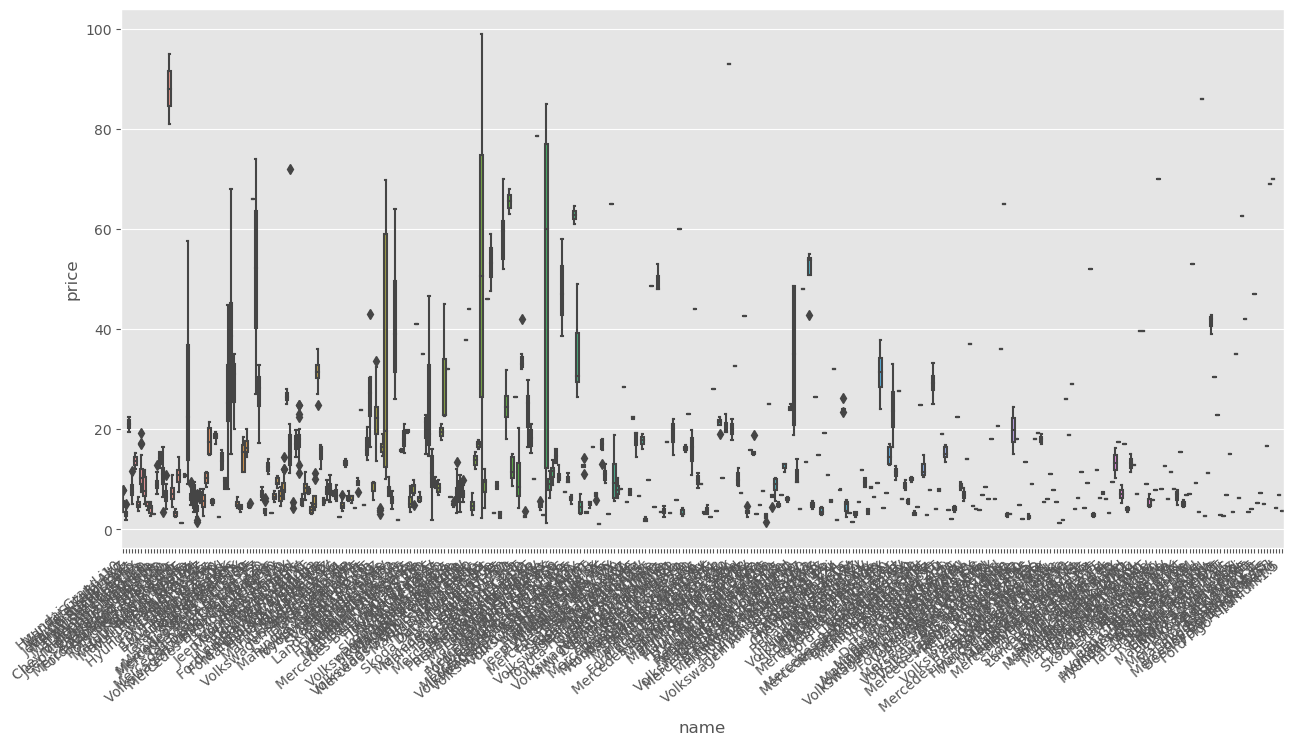

In [178]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='name',y='price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varun\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varun\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varun\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varun\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.0% of the points

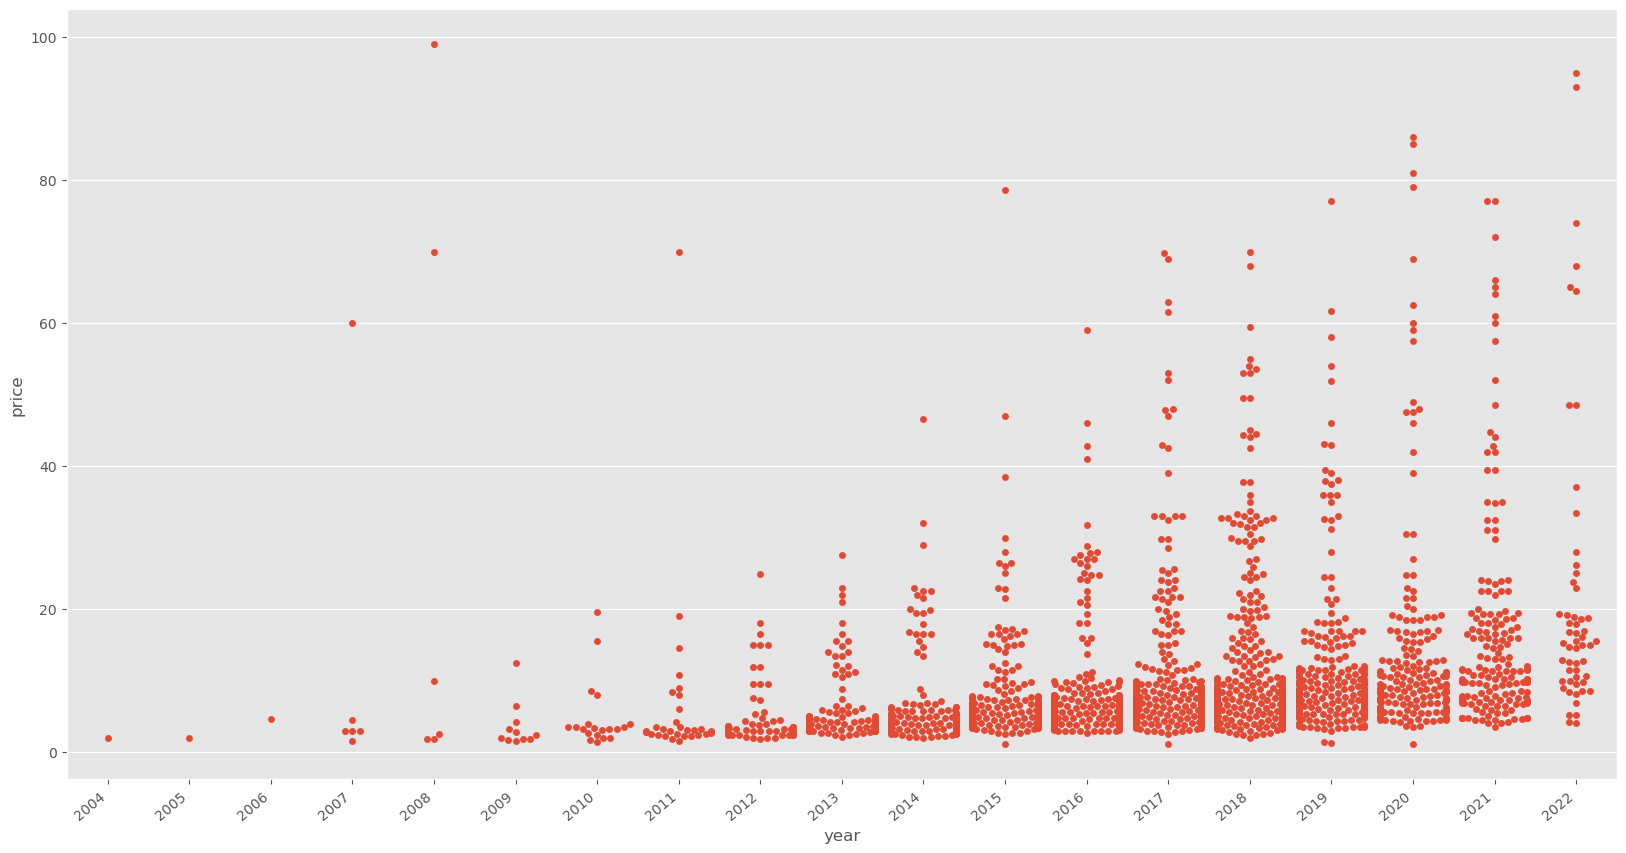

In [179]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


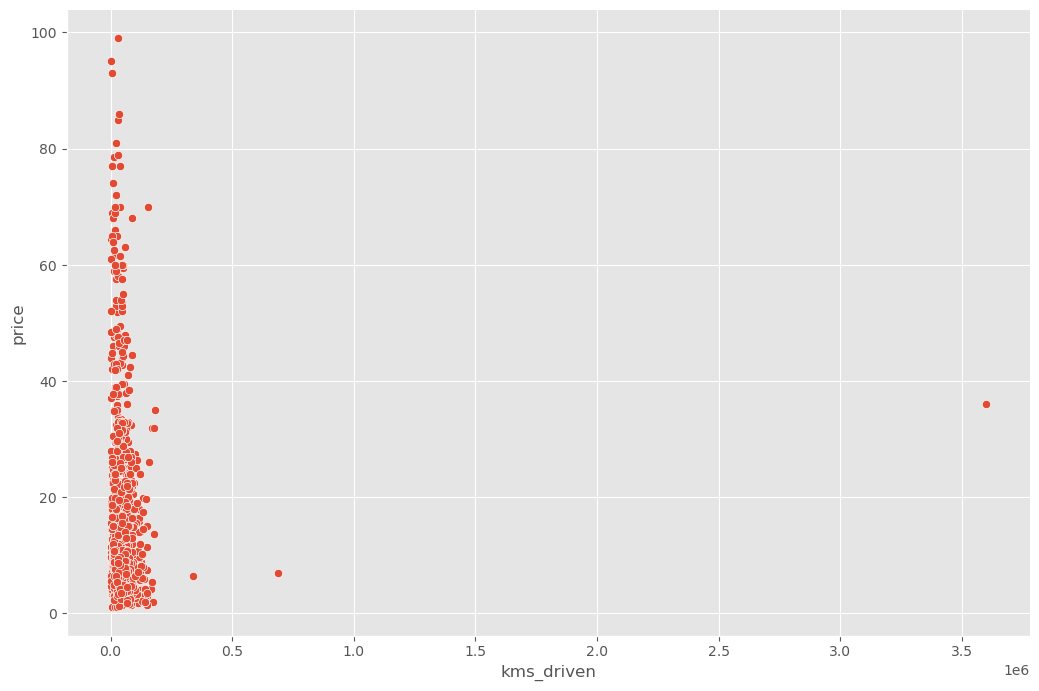

In [180]:
sns.relplot(x='kms_driven',y='price',data=car,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='price'>

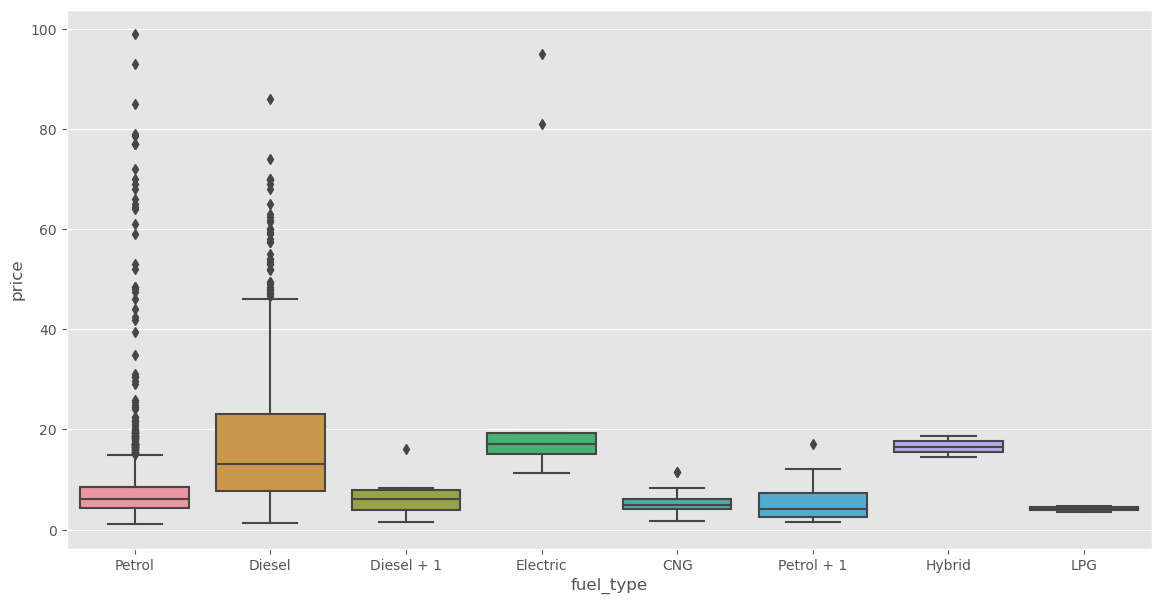

In [181]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='price',data=car)

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


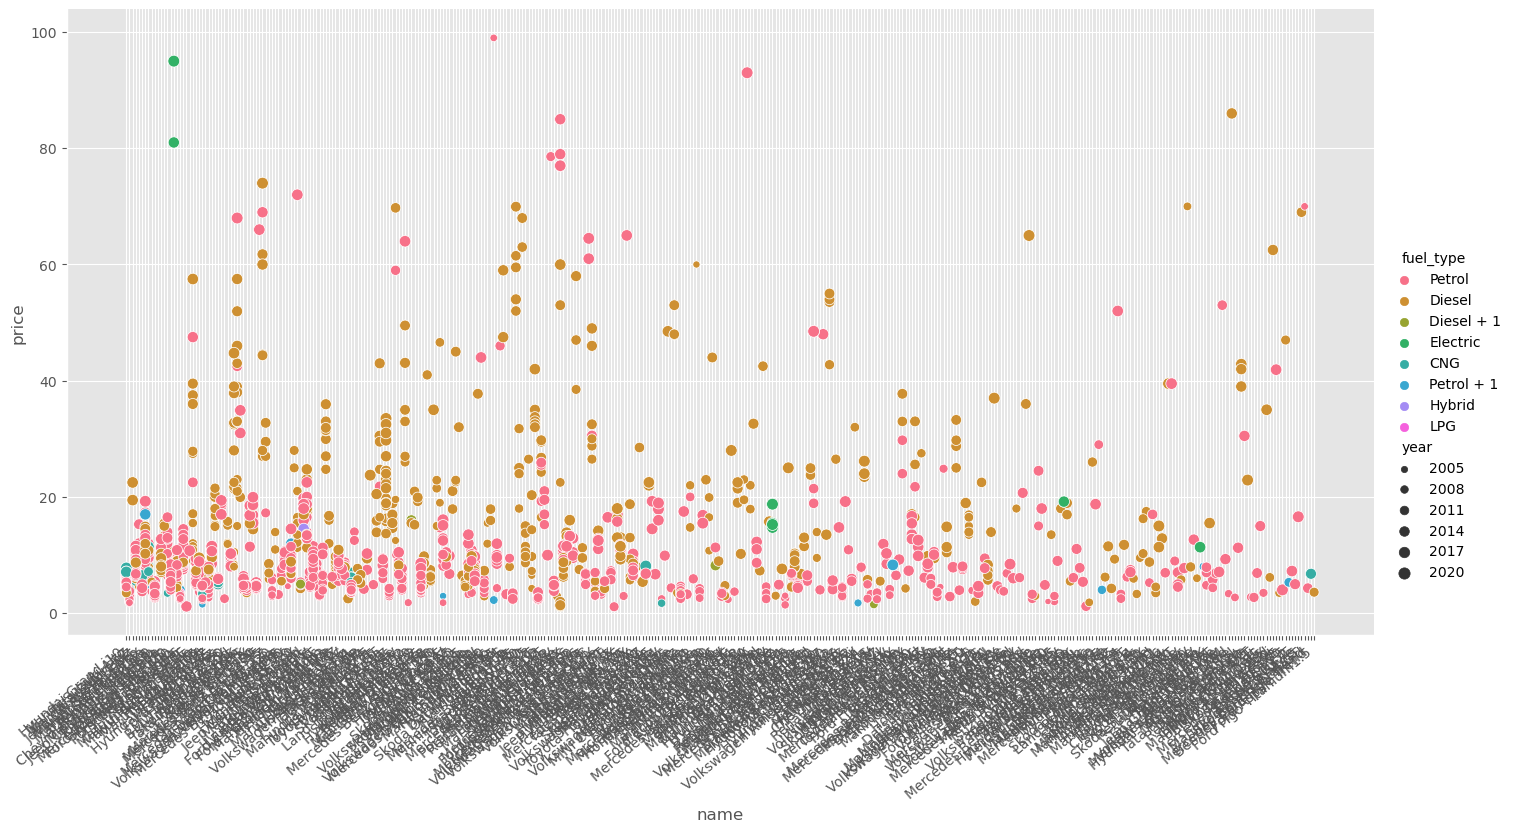

In [182]:
ax=sns.relplot(x='name',y='price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [183]:
X=car[['name','kms_driven','fuel_type','city','year',]]
y=car['price']

In [184]:
X

,name,kms_driven,fuel_type,city,year
0,Hyundai Grand i10,22402,Petrol,Mumbai,2016
1,Maruti Suzuki Alto,10344,Petrol,Kolkata,2019
2,Tata Safari XZ,12999,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz,45000,Petrol,Thane,2016
4,Jeep Compass Sport,11193,Petrol,Kolkata,2019
...,...,...,...,...,...
2100,Ford Figo Titanium1.5,42158,Diesel,Kolkata,2015
2101,MINI Cooper Countryman,68862,Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6,37622,Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz,64726,Petrol,Mumbai,2017


In [185]:
y.shape

(2105,)

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [189]:
ohe=OneHotEncoder()
ohe.fit(X[['name','fuel_type','city']])

OneHotEncoder()

In [190]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel_type','city']),
                                    remainder='passthrough')

In [191]:
lr=LinearRegression()

In [192]:
pipe=make_pipeline(column_trans,lr)

In [193]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 35', 'Audi A3 40', 'Audi A4 2.0', 'Audi A4 3.0',
       'Audi A4 35', 'Audi A4 Technology', 'Audi A6 2.0', 'Audi A6 35',
       'Audi A6 Technology', 'Audi A8 L', 'Audi Q2 Premium',
       'Audi Q3 2.0', 'Audi Q3 30', 'Audi Q3 35', 'Audi Q5 2.0',
       'Audi Q5 3.0', 'Audi...
                                                                            array(['CNG', 'Diesel', 'Diesel + 1', 'Electric', 'Hybrid', 'LPG',
       'Petrol', 'Petrol + 1'], dtype=object),
                                                                            array(['Ahmedabad', 'Ambattur', 'Bangalore', 'Chennai', 'Delhi',
       'Faridabad', 'Gurgaon', 'Hyderabad', 'Kolkata', 'Mumbai', 'Noida',
       'Pallikarnai', 'Poonamallee', 'Pune', 'Thane', 'Thiruvallur'],
      dtype=object)]),
                                                  ['name', 'fuel_type',
                                                   'city'])])),
                ('linearregression', LinearRegression())])

In [194]:
y_pred=pipe.predict(X_test)

In [195]:
r2_score(y_test,y_pred)

0.25747220597194787

In [196]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [197]:
np.argmax(scores)

708

In [198]:
scores[np.argmax(scores)]

0.4087974175223399

In [199]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Tata Safari XZ',12999,'Diesel', 'Bangalore',2021]).reshape(1,5)))

array([23.10040333])

In [200]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.4087974175223399

In [201]:
import pickle

In [202]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [203]:
pipe.predict(pd.DataFrame(columns=['name','kms_driven','fuel_type','city','year'],data=np.array(['Tata Safari XZ',12999,'Diesel', 'Bangalore',2021]).reshape(1,5)))

array([22.87261565])

In [61]:
print("Categories before fitting:")
print(pipe.named_steps['columntransformer'].named_transformers_['onehotencoder'].categories_)

Categories before fitting:
[array(['Audi A3 35', 'Audi A3 40', 'Audi A4 2.0', 'Audi A4 3.0',
       'Audi A4 35', 'Audi A4 Technology', 'Audi A6 2.0', 'Audi A6 35',
       'Audi A6 Technology', 'Audi A8 L', 'Audi Q2 Premium',
       'Audi Q3 2.0', 'Audi Q3 30', 'Audi Q3 35', 'Audi Q5 2.0',
       'Audi Q5 3.0', 'Audi Q5 30', 'Audi Q7 4.2', 'Audi Q7 45',
       'Audi Q7 Technology', 'Audi TT 45', 'BMW 3 Series', 'BMW 5 Series',
       'BMW 7 Series', 'BMW X1 sDrive20d', 'BMW X1 sDrive20i',
       'BMW X3 xDrive', 'BMW X3 xDrive20d', 'BMW X4 xDrive20d',
       'BMW X5 xDrive', 'BMW X5 xDrive30d', 'Bentley Continental GT',
       'Chevrolet Beat LS', 'Chevrolet Cruze LTZ',
       'Chevrolet Optra Magnum', 'Chevrolet Tavera Neo',
       'Citroen C5 Aircross', 'Datsun GO Plus', 'Datsun GO T',
       'Datsun GO+ T', 'Datsun redi-GO Gold', 'Datsun redi-GO S',
       'Datsun redi-GO T', 'Datsun redi-GO T(O)', 'Fiat Abarth Punto',
       'Fiat Punto Active', 'Fiat Punto Evo', 'Ford Aspire Titan

In [62]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 35', 'Audi A3 40', 'Audi A4 2.0', 'Audi A4 3.0',
       'Audi A4 35', 'Audi A4 Technology', 'Audi A6 2.0', 'Audi A6 35',
       'Audi A6 Technology', 'Audi A8 L', 'Audi Q2 Premium',
       'Audi Q3 2.0', 'Audi Q3 30', 'Audi Q3 35', 'Audi Q5 2.0',
       'Audi Q5 3.0', 'Audi...
                                                                            array(['CNG', 'Diesel', 'Diesel + 1', 'Electric', 'Hybrid', 'LPG',
       'Petrol', 'Petrol + 1'], dtype=object),
                                                                            array(['Ahmedabad', 'Ambattur', 'Bangalore', 'Chennai', 'Delhi',
       'Faridabad', 'Gurgaon', 'Hyderabad', 'Kolkata', 'Mumbai', 'Noida',
       'Pallikarnai', 'Poonamallee', 'Pune', 'Thane', 'Thiruvallur'],
      dtype=object)]),
                                                  ['name', 'fuel_type',
                                                   'city'])])),
                ('linearregression', LinearRegression())])

In [63]:
print("First few predictions:")
print(pipe.predict(X_test[:5]))

First few predictions:
[ 8.55302221 15.84886202 -1.27762617  7.46153665 15.17786563]


In [64]:
print("Categories after fitting:")
print(pipe.named_steps['columntransformer'].named_transformers_['onehotencoder'].categories_)

Categories after fitting:
[array(['Audi A3 35', 'Audi A3 40', 'Audi A4 2.0', 'Audi A4 3.0',
       'Audi A4 35', 'Audi A4 Technology', 'Audi A6 2.0', 'Audi A6 35',
       'Audi A6 Technology', 'Audi A8 L', 'Audi Q2 Premium',
       'Audi Q3 2.0', 'Audi Q3 30', 'Audi Q3 35', 'Audi Q5 2.0',
       'Audi Q5 3.0', 'Audi Q5 30', 'Audi Q7 4.2', 'Audi Q7 45',
       'Audi Q7 Technology', 'Audi TT 45', 'BMW 3 Series', 'BMW 5 Series',
       'BMW 7 Series', 'BMW X1 sDrive20d', 'BMW X1 sDrive20i',
       'BMW X3 xDrive', 'BMW X3 xDrive20d', 'BMW X4 xDrive20d',
       'BMW X5 xDrive', 'BMW X5 xDrive30d', 'Bentley Continental GT',
       'Chevrolet Beat LS', 'Chevrolet Cruze LTZ',
       'Chevrolet Optra Magnum', 'Chevrolet Tavera Neo',
       'Citroen C5 Aircross', 'Datsun GO Plus', 'Datsun GO T',
       'Datsun GO+ T', 'Datsun redi-GO Gold', 'Datsun redi-GO S',
       'Datsun redi-GO T', 'Datsun redi-GO T(O)', 'Fiat Abarth Punto',
       'Fiat Punto Active', 'Fiat Punto Evo', 'Ford Aspire Titani